# 1 Threshold-Based Segmentation

## 1.1 Brain

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

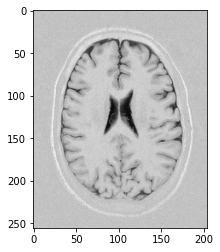

In [2]:
# Open JPEG image
img = cv2.imread('materials/brain.png',cv2.IMREAD_GRAYSCALE)

# Display image
plt.imshow(img, cmap='gray')

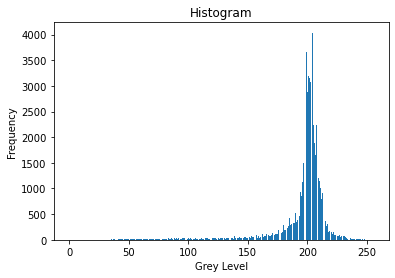

In [3]:
# show histogram
# Calculate the histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
hist = hist.reshape(256)

# Plot histogram
plt.bar(np.linspace(0,255,256), hist)
plt.title('Histogram')
plt.ylabel('Frequency')
plt.xlabel('Grey Level')
plt.show()

Manual threhold is 180


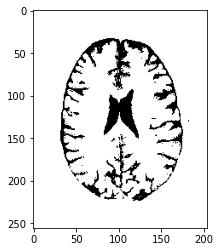

In [4]:
# threshold manually
thres = 180
_, output = cv2.threshold(img, thres, 255, cv2.THRESH_BINARY)
print('Manual threhold is %s'%thres)
plt.imshow(output, cmap='gray')

OTSU's threhold is 156.0


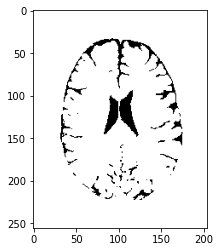

In [5]:
# threshold otsu
T, output = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
print('OTSU\'s threhold is %s'%T)
plt.imshow(output, cmap='gray')

## 1.2 Tray

Manual threhold is 140


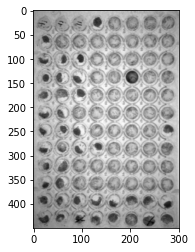

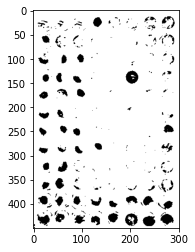

In [6]:
img = cv2.imread('materials/tray.png',cv2.IMREAD_GRAYSCALE)
# Display image
plt.figure()
plt.imshow(img, cmap='gray')

thres = 140
_, output = cv2.threshold(img, thres, 255, cv2.THRESH_BINARY)
print('Manual threhold is %s'%thres)
plt.figure()
plt.imshow(output, cmap='gray')

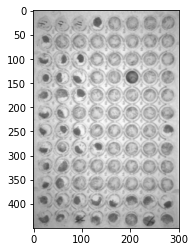

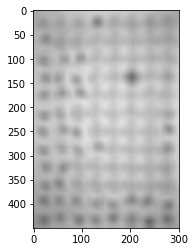

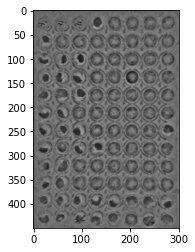

In [7]:

img = cv2.imread('materials/tray.png')
# Display image
plt.figure()
plt.imshow(img, cmap='gray')

# smooth
blur = cv2.blur(img,(20,20))
plt.figure()
plt.imshow(blur, cmap='gray')

# subtract and add it bac
img = img - blur + (int)(np.min(blur))
plt.figure()
plt.imshow(img, cmap='gray')

# 2 Labelling

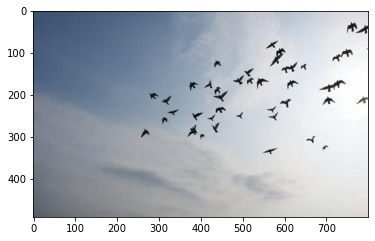

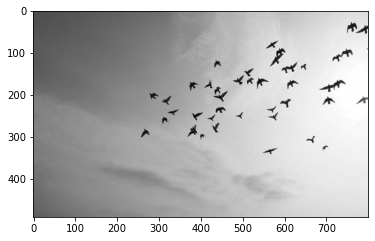

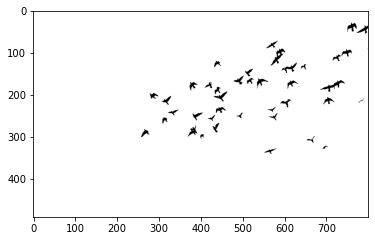

In [8]:
img = cv2.imread('materials/birds.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Display image
plt.figure()
plt.imshow(img)

plt.figure()
imgGrey =  cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
plt.imshow(imgGrey,cmap='gray')

# get the bird
thres = 76
_, bird = cv2.threshold(imgGrey, thres, 255, cv2.THRESH_BINARY)
plt.figure()
plt.imshow(bird, cmap='gray')

In [9]:
# labeling
birds_list = []
bird_img = bird.copy()
one_bird_pixel = []
height,width = bird_img.shape

def dfs(raw,col):
    if bird_img[raw][col]==0:
        one_bird_pixel.append([raw,col])
        bird_img[raw][col] = 255
    else:
        return
    if(raw-1>=0): dfs(raw-1,col)
    if(raw+1<height): dfs(raw+1,col)
    if(col-1>=0): dfs(raw,col-1)
    if(col+1<width): dfs(raw,col+1)
    
for raw in range(0,height):
    for col in range(0,width):
        dfs(raw,col)
        if(len(one_bird_pixel)>=1):
            birds_list.append(one_bird_pixel.copy())
        one_bird_pixel = []

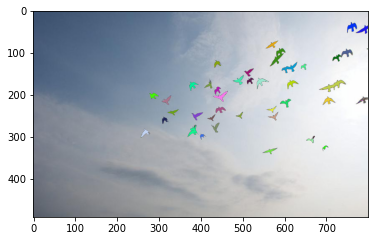

In [10]:
import random
new_img = img.copy()
for bird_idx in birds_list:
    # get random color (492, 800, 3)
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    for point in bird_idx:
        new_img[point[0]][point[1]][0] = r
        new_img[point[0]][point[1]][1] = g
        new_img[point[0]][point[1]][2] = b
plt.figure()
plt.imshow(new_img)

# 3 Stereo Imagery

## 3.1 Focal Length Calculation
focalLength_mm = focalLength_r * (sensor_mm / sensor_r) = 5806.559 pixel * (22.2 mm / 3088 pixel) = 41.74 mm

## 3.2 Disparity Map

In [11]:
# disparity.py
def getDisparityMap(imL, imR, numDisparities, blockSize):
    stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)

    disparity = stereo.compute(imL, imR)
    disparity = disparity - disparity.min() + 1 # Add 1 so we don't get a zero depth, later
    disparity = disparity.astype(np.float32) / 16.0 # Map is fixed point int with 4 fractional bits    return disparity # floating point image
    return disparity
# ================================================




# ================================================
#
def plot(disparity):
    # This just plots some sample points.  Change this function to
    # plot the 3D reconstruction from the disparity map and other values
    x = []
    y = []
    z = []
    height,width = disparity.shape
    
    baseline = 174.019 # mm
    doffs = 114.291 # resolution
    focus_len = 5806.559 # resolution

    for r in range(height):
        for c in range(width):
            depth = baseline*focus_len/(disparity[r][c]+doffs)
            x += [r]
            y += [c]
            z += [depth]

    # Plt depths
    ax = plt.axes(projection ='3d')
    ax.scatter(x, y, z, 'green',20)

    # Labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    #plt.savefig('myplot.pdf', bbox_inches='tight') # Can also specify an image, e.g. myplot.png
    plt.show()

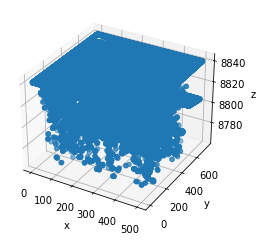

32   5


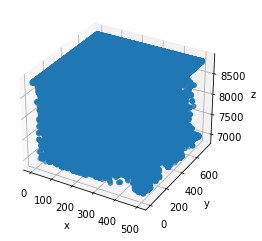

32   5


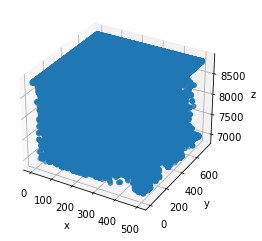

32   5


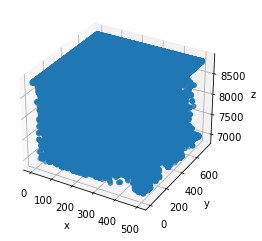

32   5


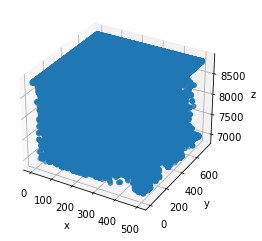

In [ ]:
# Load left image
filename = 'materials/umbrellaL.png'
imgL = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
#
if imgL is None:
    print('\nError: failed to open {}.\n'.format(filename))
    sys.exit()


# Load right image
filename = 'materials/umbrellaR.png'
imgR = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
#
if imgR is None:
    print('\nError: failed to open {}.\n'.format(filename))
    sys.exit()
    
def change(x):
    num = cv2.getTrackbarPos("num", "Disparity") * 16 
    blockSize = (int)(cv2.getTrackbarPos("blockSize", "Disparity")/2) * 2 + 1
    if(blockSize<5):
        blockSize = 5
        # Get disparity map
    disparity = getDisparityMap(imgL, imgR, num, blockSize)
    disparityImg = np.interp(disparity, (disparity.min(), disparity.max()), (0.0, 1.0))
    cv2.imshow('Disparity', disparityImg)
    print(num," ",blockSize)
    plot(disparity)

# Create a window to display the image in
cv2.namedWindow('Disparity', cv2.WINDOW_NORMAL)

disparity = getDisparityMap(imgL, imgR, 64, 9)
disparityImg = np.interp(disparity, (disparity.min(), disparity.max()), (0.0, 1.0))
cv2.imshow('Disparity', disparityImg) # Show initial image
plot(disparityImg)
cv2.createTrackbar('num', 'Disparity', 2, 10, change)
cv2.createTrackbar('blockSize', 'Disparity', 0, 31, change)

while True:
    key = cv2.waitKey(1)
    if key == ord(' ') or key == 27:
        break

cv2.destroyAllWindows()